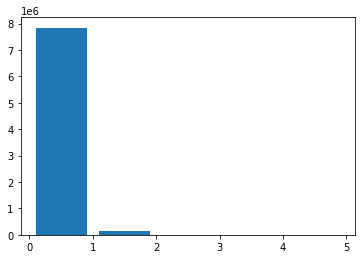

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = 'C:/Users/llschers/OneDrive - Indiana University/Documents/GitHub/Envisioning-Kaggle/Meta-Kaggle_10-25-2021'
users_df = pd.read_csv(DIR+'/Users.csv', infer_datetime_format=True)

hist_of_tier_all = plt.hist(users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)


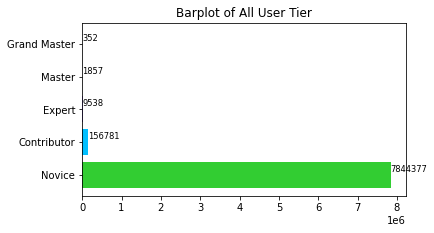

In [3]:
counts_all, bins, bars = hist_of_tier_all
#counts_all
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
#tiers
tier_counts_all_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts_all})
#tier_counts_all_df
fig_all = plt.figure(figsize=(6,3))
axes_all= fig_all.add_axes((0.2, 0.1, 0.75, 0.8))
axes_all.barh(tier_counts_all_df.Tier, tier_counts_all_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_all_df.NumOfUsers):
    plt.text(v + 0, i + .1, str(int(v)), color='black', fontsize='small')
    
plt.title("Barplot of All User Tier")
plt.savefig('All user tier barplot.png')
plt.show()

8236595.85

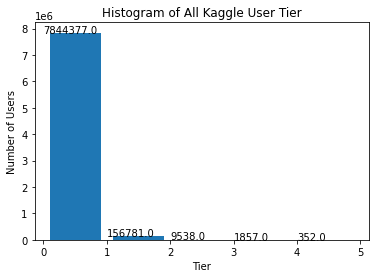

In [4]:
tier_bins=5
hist_of_tier_all = plt.hist(users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)
plt.title("Histogram of All Kaggle User Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier_all[1][i],hist_of_tier_all[0][i],str(hist_of_tier_all[0][i]))
    
bottom, top = plt.ylim()
top

In [5]:
# Now for HPA

#read in dfs and declare variables to select competition of interest

comps_df = pd.read_csv(DIR+'/Competitions.csv', parse_dates=['DeadlineDate'])

comp_title = "Human Protein Atlas - Single Cell Classification"
comp_overview = comps_df[comps_df.Title==comp_title]
comp_id = comp_overview.iloc[0]['Id']

comp_id

23823

In [6]:
teams_df = pd.read_csv(DIR+'/Teams.csv', infer_datetime_format=True)

comp_teams_df = teams_df[teams_df.CompetitionId==comp_id].dropna(subset=['LastSubmissionDate'])

team_ids_list = comp_teams_df.Id.unique().tolist()
len(team_ids_list)

758

In [7]:
team_memberships_df = pd.read_csv(DIR+'/TeamMemberships.csv', infer_datetime_format=True)
team_memberships_df.shape

(4688946, 4)

In [8]:
comp_team_memberships_df = team_memberships_df[team_memberships_df.TeamId.isin(team_ids_list)]
comp_team_memberships_df.head(5)

,Id,TeamId,UserId,RequestDate
4111659,6392100,6211199,3460291,01/27/2021
4111663,6392113,6211212,2027611,01/27/2021
4111669,6392143,6211242,5207741,01/27/2021
4111671,6392159,6211259,2294613,01/27/2021
4111672,6392161,6211261,5092791,01/27/2021


In [9]:
comp_users_list = list(comp_team_memberships_df.UserId.unique())
#comp_users_list
comp_users_df = users_df[users_df.Id.isin(comp_users_list)]

(0.0, 768.6)

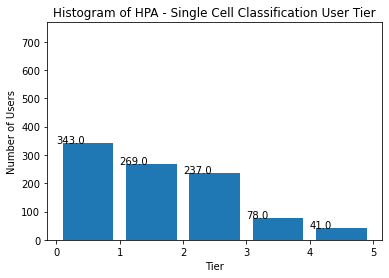

In [10]:
tier_bins=5
hist_of_tier_hpa = plt.hist(comp_users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)
plt.title("Histogram of HPA - Single Cell Classification User Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier_hpa[1][i],hist_of_tier_hpa[0][i],str(hist_of_tier_hpa[0][i]))
    
plt.ylim(top=768.6)

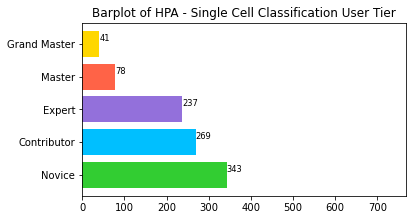

In [11]:
counts_hpa, bins, bars = hist_of_tier_hpa
#counts_all
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
#tiers
tier_counts_hpa_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts_hpa})
#tier_counts_hpa_df
fig_hpa = plt.figure(figsize=(6,3))
axes_hpa= fig_hpa.add_axes((0.2, 0.1, 0.75, 0.8))
axes_hpa.barh(tier_counts_hpa_df.Tier, tier_counts_hpa_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_hpa_df.NumOfUsers):
    plt.text(v + 0, i + .1, str(int(v)), color='black', fontsize='small')
    
plt.xlim(right=768.6)
plt.title("Barplot of HPA - Single Cell Classification User Tier")
plt.savefig('HPA user tier barplot.png')
plt.show()